###Prepare Data

In [8]:
import nltk
import pandas as pd

In [9]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/das/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/das/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
## load and prepare data
db = pd.read_csv('/home/das/Downloads/word_comparison_round_6.csv')

In [11]:
relevant = db.loc[db["classification"] == 'relevant']
not_relevant = db.loc[db["classification"] == 'irrelevant']

### Comparison of Word Frequencies: Relevant vs. Not Relevant

#### Relevant

In [12]:
not_relevant_list = not_relevant.raw_content.tolist()
not_relevant_combined = ' '.join(not_relevant_list)

In [13]:
relevant_list = relevant.raw_content.tolist()
relevant_combined = ' '.join(relevant_list)

In [14]:
from nltk.tokenize import word_tokenize
words = word_tokenize(relevant_combined.lower())

In [15]:
from nltk.corpus import stopwords
stoplist = stopwords.words('english') + ['us', 'link', 'https', 'http', 'need', 'want', 'get', 'make', 'may', 'thank', 'like', 'one', 'e', 'use', 'best', 'without', 'also', 'using', 'used', 'guys', 'dont', 'well', 'please', 'thanks', 'would', 'citing']

In [16]:
filtered_words = [word for word in words if word.isalnum() and word not in stoplist and not any(char.isdigit()for char in word)]

In [17]:
from collections import Counter
Counter(filtered_words).most_common(50)

[('cards', 394),
 ('card', 356),
 ('account', 341),
 ('information', 330),
 ('time', 326),
 ('site', 308),
 ('money', 278),
 ('data', 264),
 ('order', 262),
 ('email', 249),
 ('services', 234),
 ('service', 213),
 ('bitcoin', 206),
 ('good', 197),
 ('hack', 185),
 ('hacking', 181),
 ('quality', 180),
 ('new', 162),
 ('buy', 159),
 ('know', 156),
 ('delivery', 154),
 ('access', 153),
 ('payment', 144),
 ('hacker', 141),
 ('hackers', 139),
 ('company', 138),
 ('send', 136),
 ('content', 136),
 ('cart', 136),
 ('prepaid', 136),
 ('security', 131),
 ('work', 130),
 ('ship', 128),
 ('help', 121),
 ('online', 121),
 ('terms', 120),
 ('much', 118),
 ('package', 118),
 ('empty', 117),
 ('phone', 114),
 ('everything', 114),
 ('address', 114),
 ('pay', 113),
 ('sent', 112),
 ('number', 112),
 ('transfer', 110),
 ('first', 109),
 ('bank', 109),
 ('product', 108),
 ('personal', 108)]

In [18]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [19]:
most_common_relevant_words = Counter(filtered_words).most_common(30)

wordcloud_relevant = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_relevant_words))

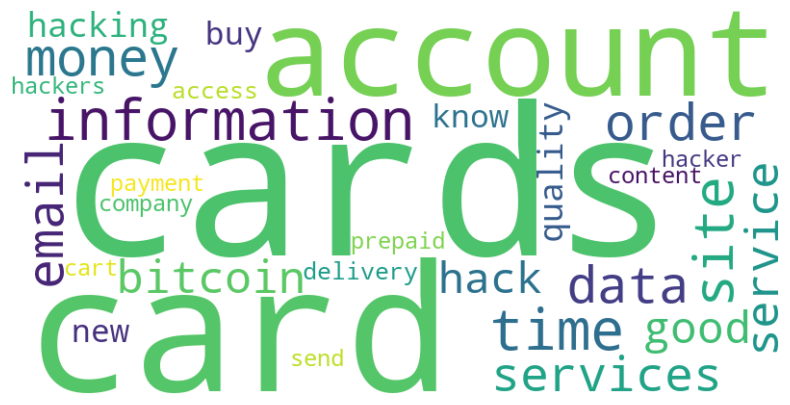

In [20]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_relevant, interpolation='bilinear')
plt.axis('off')
plt.savefig("/home/das/Downloads/wordcloud_relevant.pdf", bbox_inches='tight', dpi=300, transparent=False)
plt.show()

#### Not Relevant

In [21]:
from nltk.tokenize import word_tokenize
words_not = word_tokenize(not_relevant_combined.lower())

In [22]:
filtered_words_not = [word for word in words_not if word.isalnum() and word not in stoplist and not any(char.isdigit()for char in word)]

In [23]:
from collections import Counter
Counter(filtered_words_not).most_common(50)

[('order', 149),
 ('good', 129),
 ('time', 117),
 ('see', 116),
 ('product', 104),
 ('new', 99),
 ('read', 97),
 ('know', 91),
 ('orders', 89),
 ('quality', 79),
 ('day', 74),
 ('money', 71),
 ('ship', 67),
 ('people', 66),
 ('days', 64),
 ('great', 57),
 ('buy', 57),
 ('shipping', 56),
 ('sent', 55),
 ('service', 55),
 ('really', 55),
 ('first', 54),
 ('send', 54),
 ('account', 53),
 ('even', 53),
 ('got', 53),
 ('shipped', 53),
 ('payment', 52),
 ('number', 51),
 ('package', 50),
 ('delivery', 50),
 ('price', 49),
 ('email', 48),
 ('free', 45),
 ('card', 45),
 ('right', 44),
 ('name', 43),
 ('fast', 43),
 ('let', 42),
 ('review', 42),
 ('could', 42),
 ('stealth', 42),
 ('cart', 41),
 ('high', 40),
 ('hours', 40),
 ('take', 40),
 ('much', 39),
 ('way', 38),
 ('always', 38),
 ('back', 38)]

In [24]:
most_common_not_relevant_words = Counter(filtered_words_not).most_common(30)

wordcloud_not_relevant = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(most_common_not_relevant_words))

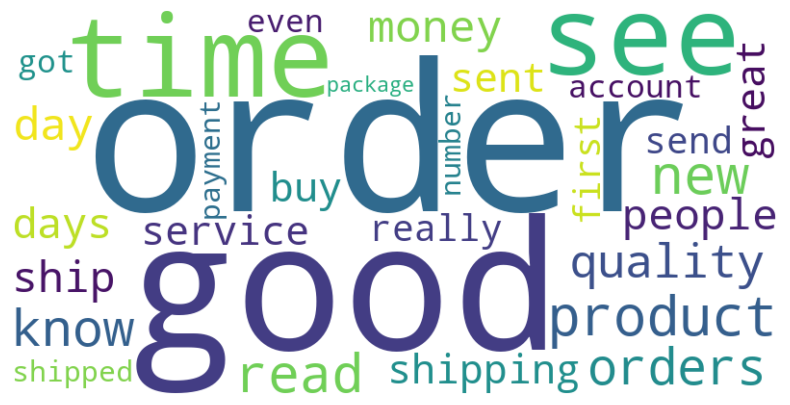

In [25]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_not_relevant, interpolation='bilinear')
plt.axis('off')
plt.savefig("/home/das/Downloads/wordcloud_not_relevant.pdf", bbox_inches='tight', dpi=300, transparent=False)
plt.show()

## Odds Ratio

In [26]:
not_relevant_dict = dict(Counter(filtered_words_not))
relevant_dict = dict(Counter(filtered_words))

In [27]:
# getting total number of words
not_rel_total = sum(x for x in not_relevant_dict.values())
rel_total = sum(x for x in relevant_dict.values())

In [28]:
not_rel_total

21868

In [29]:
# normalizing the word frequencies
not_rel_norm_dict = {key:val/not_rel_total for key, val in not_relevant_dict.items()}
rel_norm_dict = {key:val/rel_total for key, val in relevant_dict.items()}

In [30]:
# creating a joint dictionary for unique words for both classes
vocabulary = set(not_relevant_dict.keys()).union(set(relevant_dict.keys()))

In [31]:
import numpy as np

not_rel_diff_dict = {}
rel_diff_dict = {}

for word in vocabulary:
  diff = not_rel_norm_dict.get(word, 0) - rel_norm_dict.get(word, 0)
  if len(word) >= 3:
    if diff < 0 :
      not_rel_diff_dict[word] = np.abs(diff)
    else:
      rel_diff_dict[word] = diff


In [32]:
def plot_important_words(pos_dic, neg_dic, image):
    fig, ax=plt.subplots(ncols=2, figsize=(10,10))

    wc = WordCloud(background_color="black",collocations=False,max_words=50,\
                max_font_size=2000, min_font_size=8, width=800, height=1600,\
                        colormap=None ).generate_from_frequencies(pos_dic)
    ax[0].imshow(wc, interpolation='bilinear')
    ax[0].set_title("Relevant Classification Words")
    ax[0].axis("off");

    wc = WordCloud(background_color="black",collocations=False,max_words=50,\
               max_font_size=2000, min_font_size=12, width=800, height=1600,\
                     colormap='autumn' ).generate_from_frequencies(neg_dic)
    ax[1].imshow(wc, interpolation='bilinear' )
    ax[1].set_title("Not Relevant Classification Words")
    ax[1].axis("off");

    fig.set_tight_layout({'pad':1})
    fig.savefig(image)

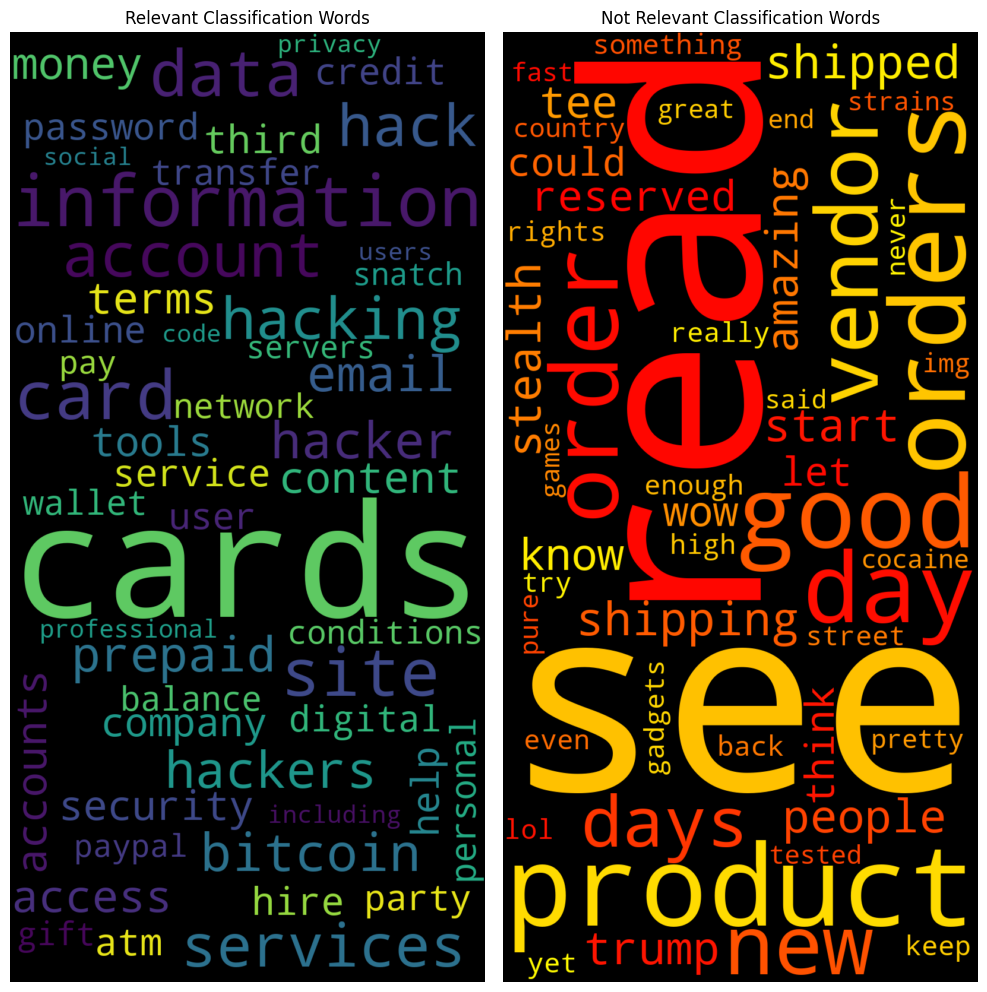

In [33]:
plot_important_words(not_rel_diff_dict, rel_diff_dict, '/home/das/Downloads/diff.jpg')